<a href="https://colab.research.google.com/github/NikolasRR/DVA-charts/blob/main/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
# Defining parameters
omega_p = 6000
Xa_max = 0.002 #meters
f0 = 250
mp = 8
zeta = 0
ka = f0/Xa_max
ma = ka/((omega_p*math.pi/30)**2)

kp = ((omega_p*math.pi/30)**2)*mp

print(ka, ma, kp)

125000.0 0.31662869888230555 3158273.408348595


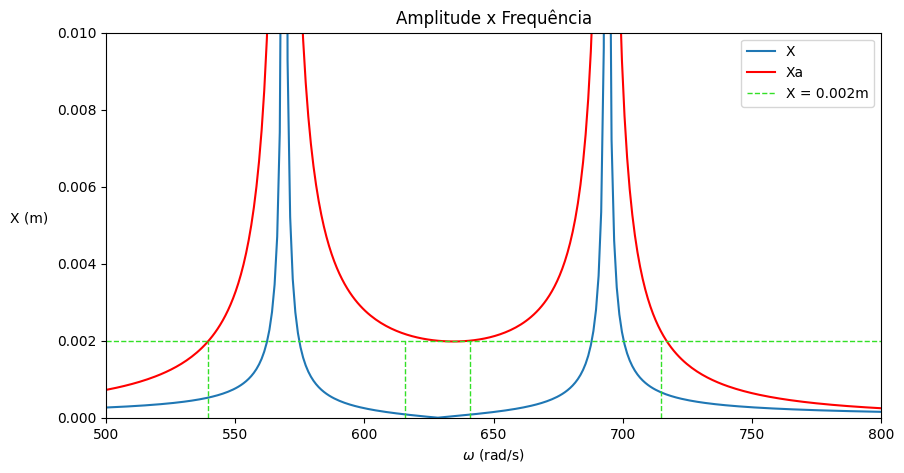

In [ ]:
omega_vector = np.linspace(500, 800, 300) # creates a vector of length = 300, from 500 to 800

# returns a vector with the results for each one of the values present in the omegas_array
primary_system_amplitude = abs(((ka - (ma*(omega_vector**2)))*f0)/(((ka + kp - (mp*(omega_vector**2)))*(ka - (ma*(omega_vector**2))))-(ka**2)))
adv_amplitude = abs((ka*f0)/(((ka + kp - (mp*(omega_vector**2)))*(ka - (ma*(omega_vector**2))))-(ka**2)))


# Initialize the figure
fig = plt.figure(figsize = (10, 5))
plt.title('Amplitude x Frequência')

# Create the plot
plt.ylim(0, 0.01)
plt.xlim(500, 800)

plt.plot(omega_vector, primary_system_amplitude, label = 'X')
plt.plot(omega_vector, adv_amplitude, label = 'Xa', color = 'red')

plt.plot(omega_vector, [Xa_max]*300, color = '#33E027', linestyle = 'dashed', linewidth = 1, label = 'X = 0.002m')

plt.legend() #ativa as labels

# Range of requencies where Xa_max <= 0.002[m]
plt.plot([539.54]*50, np.linspace(0, 0.002), color = '#33E027', linestyle = 'dashed', linewidth = 1)
plt.plot([714.94]*50, np.linspace(0, 0.002), color = '#33E027', linestyle = 'dashed', linewidth = 1)

# Range of frequencies where X*kp/f0 <= 1
plt.plot([615.75]*50, np.linspace(0, 0.002), color = '#33E027', linestyle = 'dashed', linewidth = 1)
plt.plot([640.76]*50, np.linspace(0, 0.002), color = '#33E027', linestyle = 'dashed', linewidth = 1)

plt.xlabel('$\omega$ (rad/s)')
plt.gca().set_ylabel(r"X (m)", rotation=0, fontsize=10, labelpad=20)

# Show the plot
plt.show()

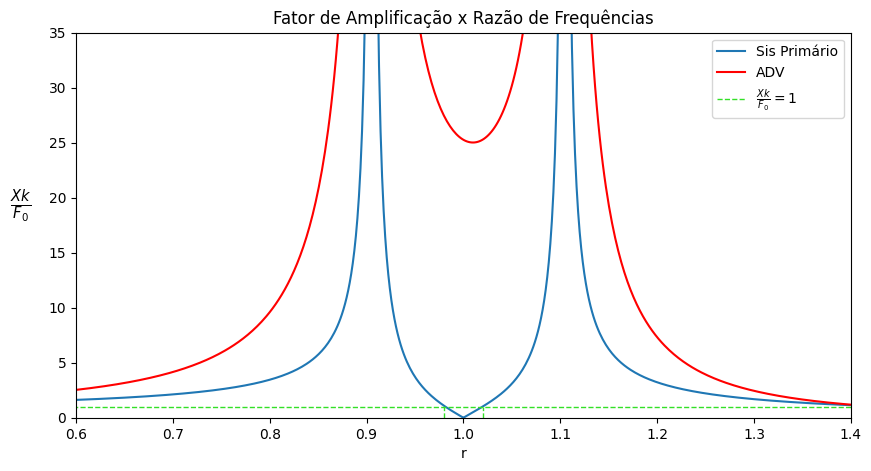

0.9799965620883455


In [ ]:
sample_size = 1000
omega_vector = np.linspace(0, 1000, sample_size)

r_vector=omega_vector/(omega_p*math.pi/30)

primary_system_amplitude = abs(((ka - (ma*(omega_vector**2)))*f0)/(((ka + kp - (mp*(omega_vector**2)))*(ka - (ma*(omega_vector**2))))-(ka**2)))
adv_amplitude = abs((ka*f0)/(((ka + kp - (mp*(omega_vector**2)))*(ka - (ma*(omega_vector**2))))-(ka**2)))

# returns a vector with the results for each one of the values present in the omegas_array
primary_system_amplification_factor = primary_system_amplitude*kp/f0
adv_amplification_factor = adv_amplitude*kp/f0 #é preciso usar a rigidez do sistema primário, pq em omega = 0, a equação fica Xa*kp/f0

# Initialize the figure
fig = plt.figure(figsize = (10, 5))
plt.title('Fator de Amplificação x Razão de Frequências')
plt.ylim(0, 35)
plt.xlim(0.6, 1.4)

# Create the plot

plt.plot(r_vector, primary_system_amplification_factor, label = 'Sis Primário')
plt.plot(r_vector, adv_amplification_factor, label = 'ADV', color = 'red')

plt.plot(r_vector, [1]*sample_size, color = '#33E027', linestyle = 'dashed', linewidth = 1, label = r'$\frac{Xk}{F_0} = 1$')

plt.legend() #ativa as labels

plt.plot([615.75/(omega_p*math.pi/30)]*50, np.linspace(0, 1), color = '#33E027', linestyle = 'dashed', linewidth = 1)
plt.plot([640.76/(omega_p*math.pi/30)]*50, np.linspace(0, 1), color = '#33E027', linestyle = 'dashed', linewidth = 1)

# Set axis labels
plt.xlabel('r')
plt.gca().set_ylabel(r"$\frac{Xk}{F_0}$", rotation=0, fontsize=15, labelpad=20)


# Show the plot
plt.show()
print(615.75/(omega_p*math.pi/30))